In [184]:
import torch
import numpy as np
import torch
from torch import nn
from torch import optim
import torch.nn.functional as F
import matplotlib.pyplot as plt
from torchvision import datasets, transforms, models
import torchvision
import shutil
from pathlib import Path

In [43]:
def move_images_to_dir(in_path, out_path):
    for file in in_path.iterdir():
        if file.is_file():
            file_name = str(file).split('/')[-1]
            dir_name = file_name.split('.')[0].split('_')[1]
            save_dir = out_path/dir_name
            save_dir.mkdir(parents=True, exist_ok=True)
            shutil.copyfile(file, save_dir/file_name)
    return save_dir/file

In [52]:
datadir_test = '/home/udit/alexnet_cifar10/data/test/'
datadir_train = '/home/udit/alexnet_cifar10/data/train/'

In [12]:
IN_TRAIN_PATH = Path(data_dir_train)
TRAIN_PATH = Path('../data/train')
IN_TEST_PATH = Path(data_dir_test)
TEST_PATH = Path('../data/test')

In [37]:
move_images_to_dir(IN_TRAIN_PATH, TRAIN_PATH)
move_images_to_dir(IN_TEST_PATH, TEST_PATH)

/home/udit/darknet/data/cifar/train


PosixPath('/home/udit/darknet/data/cifar/train/31134_cat.png')

In [228]:
train_transforms = transforms.Compose([transforms.Resize(224), transforms.ToTensor()
                                       ])

In [229]:
test_transforms = transforms.Compose([transforms.Resize(224), transforms.ToTensor()
                                      ])

In [230]:
train_data = datasets.ImageFolder(datadir_train,       
                    transform=train_transforms)
test_data = datasets.ImageFolder(datadir_test,
                    transform=test_transforms)

In [231]:
trainloader = torch.utils.data.DataLoader(train_data,sampler=train_sampler, batch_size=8)
testloader = torch.utils.data.DataLoader(test_data,sampler=test_sampler, batch_size=8)


In [232]:
class AlexNet(nn.Module):
    def __init__(self, num_classes=1000):
        super(AlexNet, self).__init__()
        self.conv_base = nn.Sequential(
            nn.Conv2d(3, 96, kernel_size=11, stride=4, padding=2, bias=False),
            nn.BatchNorm2d(96),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=3, stride=2),
            
            nn.Conv2d(96, 256, kernel_size=5, stride=1, padding=2, bias=False),
            nn.BatchNorm2d(256),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=3, stride=2),
            
            nn.Conv2d(256, 384, kernel_size=3, stride=1, padding=1),
            nn.ReLU(inplace=True),
            
            nn.Conv2d(384, 384, kernel_size=3, stride=1, padding=1),
            nn.ReLU(inplace=True),
            
            nn.Conv2d(384, 256, kernel_size=3, stride=1, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=3, stride=2),
        )
        self.fc_base = nn.Sequential(
            nn.Dropout(),
            nn.Linear(256*6*6, 4096),
            nn.ReLU(inplace=True),
            
            nn.Dropout(),
            nn.Linear(4096, 4096),
            nn.ReLU(inplace=True),
            
            nn.Linear(4096, num_classes),
        )
        
    def forward(self, x):
        x = self.conv_base(x)
        x = x.view(x.size(0), 256*6*6)
        x = self.fc_base(x)
        return x

In [233]:
model = models.alexnet(pretrained=False, num_classes=10)
print(model)

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
    (2): ReLU(inplace)
    (3): Dropout(p

In [234]:
for param in model.parameters():
    #print(type(param.data),param.size)
    param.requires_grad = True
# model.fc = nn.Sequential(nn.Linear(2048, 512),
#                                  nn.ReLU(),
#                                  nn.Dropout(0.2),
#                                  nn.Linear(512, 10),
#                                  nn.LogSoftmax(dim=1))
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.003)


device = torch.device("cuda" if torch.cuda.is_available() 
                                  else "cpu")
model.to(device)

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
    (2): ReLU(inplace)
    (3): Dropout(p

In [235]:
epochs = 2

In [236]:
for epoch in range(epochs):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)
        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 50 == 0:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

[1,     1] loss: 0.001
[1,    51] loss: 0.305
[1,   101] loss: 0.058
[1,   151] loss: 0.058
[1,   201] loss: 0.058
[1,   251] loss: 0.058
[1,   301] loss: 0.057
[1,   351] loss: 0.057
[1,   401] loss: 0.058
[1,   451] loss: 0.058
[1,   501] loss: 0.058
[1,   551] loss: 0.058
[1,   601] loss: 0.058
[1,   651] loss: 0.058
[1,   701] loss: 0.058
[1,   751] loss: 0.058
[1,   801] loss: 0.058
[1,   851] loss: 0.058
[1,   901] loss: 0.058
[1,   951] loss: 0.058
[1,  1001] loss: 0.058
[1,  1051] loss: 0.058
[1,  1101] loss: 0.058
[1,  1151] loss: 0.058
[1,  1201] loss: 0.058
[1,  1251] loss: 0.058
[1,  1301] loss: 0.058
[1,  1351] loss: 0.058
[1,  1401] loss: 0.058
[1,  1451] loss: 0.058
[1,  1501] loss: 0.058
[1,  1551] loss: 0.058
[1,  1601] loss: 0.058
[1,  1651] loss: 0.058
[1,  1701] loss: 0.058
[1,  1751] loss: 0.058
[1,  1801] loss: 0.058
[1,  1851] loss: 0.058
[1,  1901] loss: 0.058
[1,  1951] loss: 0.058
[1,  2001] loss: 0.058
[1,  2051] loss: 0.058
[1,  2101] loss: 0.058
[1,  2151] 

In [237]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))


Accuracy of the network on the 10000 test images: 10 %


In [197]:
test_data.class_to_idx

{'airplane': 0,
 'automobile': 1,
 'bird': 2,
 'cat': 3,
 'deer': 4,
 'dog': 5,
 'frog': 6,
 'horse': 7,
 'ship': 8,
 'truck': 9}

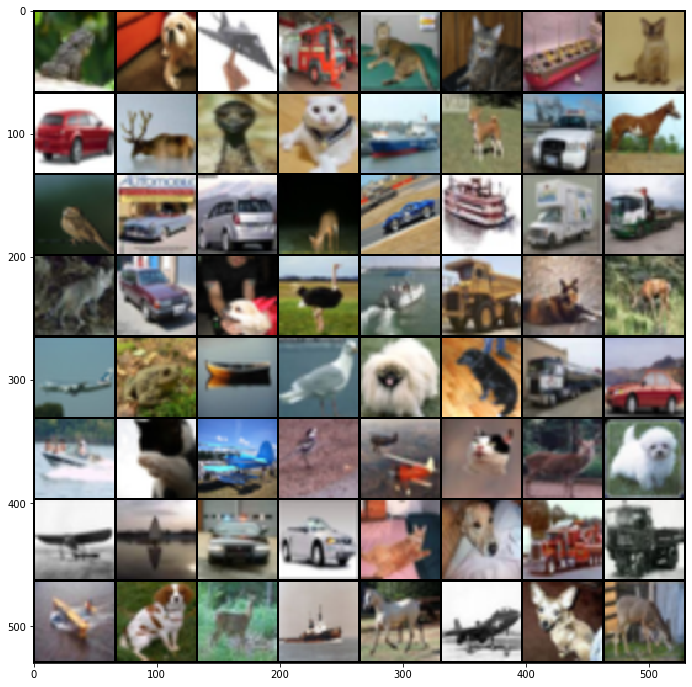

In [200]:
dataiter = iter(testloader)
images, labels = dataiter.next()

# print images
grid = torchvision.utils.make_grid(images)
plt.figure(figsize=(12, 12))
plt.imshow(np.transpose(grid, (1, 2, 0)))
# print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [201]:
images, labels = images.to(device), labels.to(device)
outputs = model(images)
_, predicted = torch.max(outputs, 1)

In [209]:
images.cpu().numpy()

0